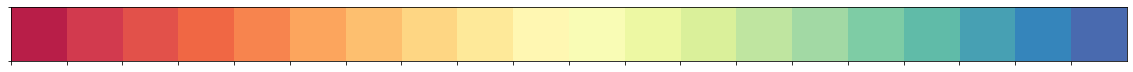

In [1]:
import pandas as pd
import numpy as np
import scipy 
import seaborn as sns
from matplotlib import pyplot as plt
import re
from matplotlib.ticker import MaxNLocator
import squarify
import textwrap3
from textwrap3 import wrap
import random2


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"

pal = sns.color_palette("Spectral", 20)
customPalette = pal.as_hex()
sns.set_palette(customPalette)
sns.palplot(customPalette)

In [2]:
analysis = '/work/projects/ecosystem_biology/archaea/coevolution/analysis'
pics = '/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/pics'

# <center>Import mmseqs2 clusters<center>

## Investigate data

<center>ALL KNOWN dataset<center>


In [4]:
repres_ak = pd.read_csv(analysis+'/mmseqs2/archaea_all_known/clustering_0.9seqid_0.9c.tsv',
           sep='\t', header=None, names=['rpr', 'protein'])

repres_ak['rpr'].unique().shape


(3027810,)

Create the *cluster id* column:

In [5]:
repres_ak.rpr = pd.Categorical(repres_ak.rpr)
repres_ak['cluster'] = repres_ak.rpr.cat.codes
repres_ak.head()

rpr             protein  cluster
0  3300025854_5_693    3300025854_5_693  1477427
1  3300025854_5_693  3300009029_24_1147  1477427
2  3300025854_5_693   3300025600_31_120  1477427
3  3300025854_5_821    3300025854_5_821  1477457
4  3300025854_5_821  3300025836_26_1471  1477457

count how many proteins are in clusters and plot:

In [6]:
clusters_ak = repres_ak[['cluster',  'protein']].sort_values('cluster')

cluster_counts_ak = clusters_ak.groupby('cluster', as_index=False).agg({'protein':'count'})\
.rename(columns={'protein':'count'})\
.sort_values('count', ascending=False)



In [7]:
# plt.hist(cluster_counts_ak[(cluster_counts_ak['count']>=50)]['count'], color = 'forestgreen', edgecolor = 'black',
#          bins = 100)

# plt.title('protein clusters: all known archaea \n distribution of proteins (above 50) in clusters \n')
# plt.xlabel('proteins in cluster')
# plt.ylabel('count')
# plt.xlim(left=5)
# plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

# plt.savefig(pics+'/protein_clusters_AK_>50.png', quality = 95, dpi = 200)

# plt.show()

In [8]:
# plt.hist(cluster_counts_ak[(cluster_counts_ak['count']<=50)]['count'], color = 'forestgreen', edgecolor = 'black',
#          bins = 50)

# plt.title('protein clusters: all known archaea \n distribution of proteins (below 50) in clusters \n')
# plt.xlabel('proteins in cluster')
# plt.ylabel('count')
# plt.xlim(left=0)
# plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

# plt.savefig(pics+'/protein_clusters_AK_<50.png', quality = 95, dpi = 200)

<center>GUT dataset<center>

In [3]:
repres_gut = pd.read_csv(analysis+'/mmseqs2/archaea_gut/clustering_0.9seqid_0.9c.tsv',
           sep='\t', header=None, names=['rpr', 'protein'])

repres_gut['rpr'].unique().shape


(250218,)

In [4]:
repres_gut.rpr = pd.Categorical(repres_gut.rpr)
repres_gut['cluster'] = repres_gut.rpr.cat.codes
repres_gut.head()


rpr                      protein  cluster
0  GUT_GENOME048397.fasta_237   GUT_GENOME048397.fasta_237    38769
1  GUT_GENOME048397.fasta_301   GUT_GENOME048397.fasta_301    38785
2  GUT_GENOME048397.fasta_301  GUT_GENOME048380.fasta_1496    38785
3  GUT_GENOME048397.fasta_333   GUT_GENOME048397.fasta_333    38799
4  GUT_GENOME048397.fasta_333    GUT_GENOME048380.fasta_54    38799

In [11]:
# clusters_gut = repres_gut[['cluster',  'protein']].sort_values('cluster')

# cluster_counts_gut = clusters_gut.groupby('cluster', as_index=False).agg({'protein':'count'})\
# .rename(columns={'protein':'count'})\
# .sort_values('count', ascending=False)



# plt.hist(cluster_counts_gut[(cluster_counts_gut['count']>=50)]['count'], color = 'indigo', edgecolor = 'black',
#          bins = 100)

# plt.title('protein clusters: gut archaea \n distribution of proteins (above 50) in clusters \n')
# plt.xlabel('proteins in cluster')
# plt.ylabel('count')
# plt.xlim(left=5)
# plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

# plt.savefig(pics+'/protein_clusters_GUT_>50.png', quality = 95, dpi = 200)


In [12]:
# plt.hist(cluster_counts_gut[(cluster_counts_gut['count']<=50)]['count'], color = 'indigo', edgecolor = 'black',
#          bins = 50)

# plt.title('protein clusters: gut archaea \n distribution of proteins (below 50) in clusters \n')
# plt.xlabel('proteins in cluster')
# plt.ylabel('count')
# plt.xlim(left=0)
# plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

# plt.savefig(pics+'/protein_clusters_GUT_<50.png', quality = 95, dpi = 200)

## <center> Extract proteins unique for gut <center>

In [14]:
df_gut = repres_gut[['protein', 'cluster']]
df_gut['origin'] = 'gut'

df_ak = repres_ak[['protein', 'cluster']]
df_ak['origin'] = 'not_gut'


df_gut = df_gut.merge(cluster_counts_gut)
df_ak = df_ak.merge(cluster_counts_ak)

df_gut.to_csv(analysis+'/intermediate_results/df_gut.csv', index=False)
df_ak.to_csv(analysis+'/intermediate_results/df_ak.csv', index=False)

## Upload

In [15]:
df_gut = pd.read_csv(analysis+'/intermediate_results/df_gut.csv')
df_ak = pd.read_csv(analysis+'/intermediate_results/df_ak.csv')

mark proteins from gut as *gut* in the **df_ak** data

In [16]:
tmp = df_ak.merge(df_gut, on='protein', how='outer').sort_values('cluster_y')

df_mixed = tmp[['protein', 'cluster_x', 'count_x', 'origin_y']]\
.fillna('not_gut')\
.rename(columns={'cluster_x':'cluster',
                'count_x':'count',
                'origin_y':'origin'})

In [17]:
df_mixed.to_csv(analysis+'/intermediate_results/all_archaea_proteins.csv', index_label=False)

clusters with only 1 category should be homogeneous (either *gut* or *not gut*):

<center>2A) Create a lise with candidate proteins<center>

remove clusters with 1 protein coming from *not gut*:

In [18]:
df_mixed = df_mixed[~df_mixed['protein'].isin(df_mixed[(df_mixed['count']==1) 
                                            & (df_mixed['origin']== 'not_gut')]['protein'])]

now all clusters with 1 protein are from *gut*:

In [19]:
df_mixed[df_mixed['count']==1].origin.unique()

array(['gut'], dtype=object)

<!-- then remove clusters having 2 categories in *df_mixed*:  -->
Create a df with how many categories each cluster has:

In [20]:
two_categories = df_mixed.groupby(['cluster','origin'], as_index=False)\
.agg({'protein':'count'})\
.groupby('cluster', as_index=False)\
.agg({'origin':'count'})\
.rename(columns={'origin':'how_many_categories'})\
.sort_values(['cluster'], ascending=[False])

two_categories #1083072

cluster  how_many_categories
1083071  3027805                    2
1083070  3027788                    2
1083069  3027782                    2
1083068  3027777                    2
1083067  3027772                    2
...          ...                  ...
4             46                    1
3             28                    1
2             14                    1
1             13                    1
0              8                    1

[1083072 rows x 2 columns]

👆 тут кластеры названы как в df_ak

<!-- удалить кластеры с 1 категорией *not gut*: -->
оставить кластеры с 1 катеорией *gut*: 

In [21]:
dw = two_categories[two_categories.how_many_categories==1][['cluster']].merge(df_mixed)
candidate_1 = dw[dw.origin=='gut'][['cluster', 'protein']]

таким образом, *candidate_1* - это **gut** белки, которые в *df_ak* так же кластеризуются только с **gut** белками

всего таких 734,860

In [22]:
candidate_1 #734860

cluster                      protein
0        3027552   GUT_GENOME286611.fasta_980
1        3027551   GUT_GENOME074412.fasta_995
2        3027551   GUT_GENOME259117.fasta_107
3        3027551   GUT_GENOME282407.fasta_368
4        3027551   GUT_GENOME258129.fasta_224
...          ...                          ...
3993893   286608            3300005692_2_1003
3993894   286608  GUT_GENOME024240.fasta_1503
3993895   286607            3300005692_2_1000
3993896   286606              3300005692_2_10
3993897   286605               3300005692_2_1

[734860 rows x 2 columns]

<center>2B) убедиться, что нет белков, которые в *df_gut* являются одним кластером, а в *df_ak* частично кластеризуются в **not_gut** белками<center>

tmp - это датафрейм, который содержит кластеры с 2мя категориями

In [23]:
tmp = two_categories[two_categories.how_many_categories==2][['cluster']].merge(df_mixed)
tmp.head(50)

cluster                      protein  count   origin
0   3027805   GUT_GENOME161287.fasta_807      2      gut
1   3027805   GUT_GENOME286660.fasta_978      2  not_gut
2   3027788  GUT_GENOME272455.fasta_1275      9      gut
3   3027788  GUT_GENOME117039.fasta_1538      9      gut
4   3027788  GUT_GENOME163102.fasta_1362      9      gut
5   3027788   GUT_GENOME053306.fasta_451      9      gut
6   3027788   GUT_GENOME138598.fasta_317      9      gut
7   3027788   GUT_GENOME070697.fasta_693      9      gut
8   3027788    GUT_GENOME135513.fasta_64      9      gut
9   3027788   GUT_GENOME105979.fasta_916      9      gut
10  3027788   GUT_GENOME286660.fasta_938      9  not_gut
11  3027782  GUT_GENOME162792.fasta_1645      3      gut
12  3027782   GUT_GENOME233332.fasta_816      3      gut
13  3027782   GUT_GENOME286660.fasta_928      3  not_gut
14  3027777  GUT_GENOME130066.fasta_1591      4      gut
15  3027777  GUT_GENOME014948.fasta_1276      4      gut
16  3027777   GUT_GENOME238481.fasta_243      4      gut
17  3027777   GUT_GENOME286660.fasta_914      4  not_gut
18  3027772           3300029851_24_1513      2      gut
19  3027772   GUT_GENOME286660.fasta_903      2  not_gut
20  3027771  GUT_GENOME106327.fasta_1605      3      gut
21  3027771   GUT_GENOME233869.fasta_627      3      gut
22  3027771   GUT_GENOME286660.fasta_899      3  not_gut
23  3027756  GUT_GENOME254183.fasta_1054      3      gut
24  3027756   GUT_GENOME077512.fasta_588      3      gut
25  3027756   GUT_GENOME286660.fasta_860      3  not_gut
26  3027748   GUT_GENOME087549.fasta_711      2      gut
27  3027748   GUT_GENOME286660.fasta_850      2  not_gut
28  3027747  GUT_GENOME264533.fasta_1249      5      gut
29  3027747   GUT_GENOME116071.fasta_980      5      gut
30  3027747  GUT_GENOME161291.fasta_1066      5      gut
31  3027747  GUT_GENOME074458.fasta_1136      5      gut
32  3027747   GUT_GENOME286660.fasta_846      5  not_gut
33  3027746  GUT_GENOME004154.fasta_1069      2      gut
34  3027746   GUT_GENOME286660.fasta_841      2  not_gut
35  3027741  GUT_GENOME207148.fasta_1304      2      gut
36  3027741   GUT_GENOME286660.fasta_819      2  not_gut
37  3027740   GUT_GENOME246722.fasta_996      2      gut
38  3027740   GUT_GENOME286660.fasta_818      2  not_gut
39  3027733   GUT_GENOME095081.fasta_952      3      gut
40  3027733   GUT_GENOME019331.fasta_759      3      gut
41  3027733   GUT_GENOME286660.fasta_801      3  not_gut
42  3027732   GUT_GENOME019331.fasta_761      4      gut
43  3027732   GUT_GENOME095081.fasta_950      4      gut
44  3027732   GUT_GENOME185225.fasta_809      4      gut
45  3027732   GUT_GENOME286660.fasta_799      4  not_gut
46  3027731   GUT_GENOME066503.fasta_273     12      gut
47  3027731   GUT_GENOME071966.fasta_349     12      gut
48  3027731  GUT_GENOME265025.fasta_1522     12      gut
49  3027731  GUT_GENOME283665.fasta_1755     12      gut

👆 clusters which have *gut* proteins which group with *not gut* proteins in *df_mixed*

из них выбираем гат белки и мерджим с датафреймом всех гат белков. таким образом опредяем, в каких кластерах сидят белки, которые в all known дате кластеризовались с not gut

таким оборазом, clusteres_2_remove - это кластеры, где сидят белки с гомологами в not gut среде (по df_ak).
названия кластеров - по df_gut

In [24]:
clusters_2_remove = pd.DataFrame(tmp[tmp.origin == 'gut'][['protein']].merge(df_gut)['cluster'].unique(),
            columns=['cluster'])

clusters_2_remove #17083

cluster
0       124831
1        92506
2       136893
3        13635
4       120389
...        ...
17078    85554
17079    85582
17080    86237
17081    87978
17082    87580

[17083 rows x 1 columns]

показать белки, в этих кластерах 

In [25]:
proteins_2_remove = clusters_2_remove.merge(df_gut)
proteins_2_remove #1165727 - total number, not necessarily the ones from candidate_1

cluster                      protein origin  count
0         124831   GUT_GENOME148517.fasta_358    gut    626
1         124831  GUT_GENOME161291.fasta_1093    gut    626
2         124831           3300029378_22_1418    gut    626
3         124831   GUT_GENOME020819.fasta_332    gut    626
4         124831   GUT_GENOME021873.fasta_426    gut    626
...          ...                          ...    ...    ...
1165722    85554  GUT_GENOME103718.fasta_1116    gut      1
1165723    85582  GUT_GENOME103718.fasta_1141    gut      1
1165724    86237  GUT_GENOME103718.fasta_1737    gut      1
1165725    87978   GUT_GENOME103718.fasta_342    gut      1
1165726    87580  GUT_GENOME103718.fasta_2950    gut      1

[1165727 rows x 4 columns]

далее удаляем из кандидатов_1 те белки, что сидят в кластерах с not gut

In [26]:
unique_gut_proteins = candidate_1[~candidate_1['protein'].isin(proteins_2_remove['protein'])][['protein']]
unique_gut_proteins #707754

protein
0         GUT_GENOME286611.fasta_980
1         GUT_GENOME074412.fasta_995
2         GUT_GENOME259117.fasta_107
3         GUT_GENOME282407.fasta_368
4         GUT_GENOME258129.fasta_224
...                              ...
3993893            3300005692_2_1003
3993894  GUT_GENOME024240.fasta_1503
3993895            3300005692_2_1000
3993896              3300005692_2_10
3993897               3300005692_2_1

[707754 rows x 1 columns]

дать этим белкам название *gut* кластера

In [27]:
unique_gut_proteins = unique_gut_proteins.merge(df_gut).sort_values('count', ascending=False)
unique_gut_proteins # 707754

protein  cluster origin  count
304074   GUT_GENOME105707.fasta_539   120470    gut    895
303911  GUT_GENOME265514.fasta_1178   120470    gut    895
303918    GUT_GENOME105979.fasta_65   120470    gut    895
303917   GUT_GENOME118556.fasta_882   120470    gut    895
303916   GUT_GENOME118930.fasta_541   120470    gut    895
...                             ...      ...    ...    ...
333935   GUT_GENOME126972.fasta_219   106841    gut      1
333934   GUT_GENOME126972.fasta_220   106842    gut      1
333931   GUT_GENOME126972.fasta_223   106843    gut      1
333930   GUT_GENOME126972.fasta_227   106845    gut      1
707753               3300005692_2_1        0    gut      1

[707754 rows x 4 columns]

In [28]:
# unique_gut_proteins = unique_gut_proteins[unique_gut_proteins['count']>=10]

# if i do this then no unique proteins are left, probable those ones groupped to small clusters are unique to arcahea in gut

In [29]:
df_gut.shape, unique_gut_proteins.shape

((1873481, 4), (707754, 4))

In [30]:
unique_gut_proteins.cluster.nunique()

233135

In [31]:
707754/1873481

0.3777748479968572

## 👆 37% известных архейных белков уникальны для GUT среды

срвнить те ли же это класетры что в начальных данных

In [32]:
check = df_gut[df_gut['cluster'].isin(unique_gut_proteins['cluster'])]
check = check.sort_values('count', ascending=False)

In [33]:
check.reset_index(drop=True, inplace=True)
unique_gut_proteins.reset_index(drop=True, inplace=True)

In [34]:
check['protein'].sort_index(inplace=True)
unique_gut_proteins['protein'].sort_index(inplace=True)

In [35]:
a = check['protein']
b = unique_gut_proteins['protein']

In [36]:
from collections import Counter

In [37]:
def compare(s, t):
    return Counter(s) == Counter(t)

In [38]:
compare(a,b)

True

#### Сохранить

In [39]:
unique_gut_proteins.to_csv(analysis+'/unique_gut_proteins.csv', index=False)

In [5]:
df = pd.read_csv(analysis+'/unique_gut_proteins.csv', index_col=False)[['protein', 'cluster']]
df.head()

protein  cluster
0   GUT_GENOME105707.fasta_539   120470
1  GUT_GENOME265514.fasta_1178   120470
2    GUT_GENOME105979.fasta_65   120470
3   GUT_GENOME118556.fasta_882   120470
4   GUT_GENOME118930.fasta_541   120470

In [6]:
df.cluster.nunique()

233135

In [7]:
# df['cluster'] = 'a_' + df['cluster'].astype(str)

In [8]:
df.cluster.nunique()

233135

keep only clusters with n>=2 proteins

In [10]:
tmp = df.groupby('cluster', as_index=False).agg({'protein':'count'})
tmp = tmp[tmp.protein!=1].sort_values('protein', ascending=False)
tmp

cluster  protein
110731   120470      895
2924       3238      892
2150       2378      885
152520   163863      872
56275     59370      870
...         ...      ...
141144   151983        2
55669     58674        2
55678     58683        2
55696     58702        2
3             3        2

[61123 rows x 2 columns]

In [11]:
tmp = df.merge(tmp, on='cluster')[['protein_x', 'cluster']].rename(columns={'protein_x':'protein'})
tmp.drop_duplicates(['protein', 'cluster'], inplace=True)
tmp

protein  cluster
0        GUT_GENOME105707.fasta_539   120470
1       GUT_GENOME265514.fasta_1178   120470
2         GUT_GENOME105979.fasta_65   120470
3        GUT_GENOME118556.fasta_882   120470
4        GUT_GENOME118930.fasta_541   120470
...                             ...      ...
535737   GUT_GENOME103408.fasta_331    82874
535738  GUT_GENOME230112.fasta_1420   125660
535739  GUT_GENOME152906.fasta_1285   125660
535740   GUT_GENOME103408.fasta_336    82879
535741  GUT_GENOME232921.fasta_1902    82879

[535742 rows x 2 columns]

match clusters to representatives

In [12]:
rpr2cluster = repres_gut[['rpr', 'cluster']].drop_duplicates(['rpr', 'cluster'])
rpr2cluster

rpr  cluster
0        GUT_GENOME048397.fasta_237    38769
1        GUT_GENOME048397.fasta_301    38785
3        GUT_GENOME048397.fasta_333    38799
5        GUT_GENOME048397.fasta_749    38913
6        GUT_GENOME048397.fasta_813    38926
...                             ...      ...
1873475  GUT_GENOME068055.fasta_385    54309
1873476  GUT_GENOME068055.fasta_513    54353
1873477  GUT_GENOME068055.fasta_545    54374
1873478  GUT_GENOME068055.fasta_769    54446
1873480  GUT_GENOME068055.fasta_801    54457

[250218 rows x 2 columns]

In [19]:
rprs_for_distance_measure = tmp.merge(rpr2cluster, on=['cluster'])[['rpr', 'cluster']].drop_duplicates(['rpr', 'cluster'])
rprs_for_distance_measure['cluster'] = 'a_' + rprs_for_distance_measure['cluster'].astype(str)
rprs_for_distance_measure


rpr   cluster
0        GUT_GENOME143257.fasta_877  a_120470
895               3300029688_21_551    a_3238
1787              3300029340_36_733    a_2378
2672    GUT_GENOME218743.fasta_1604  a_163863
3544     GUT_GENOME071982.fasta_182   a_59370
...                             ...       ...
535732   GUT_GENOME282014.fasta_348  a_237109
535734   GUT_GENOME269779.fasta_557  a_224069
535736   GUT_GENOME103408.fasta_331   a_82874
535738  GUT_GENOME152906.fasta_1285  a_125660
535740   GUT_GENOME103408.fasta_336   a_82879

[61123 rows x 2 columns]

save to *instructions* for making PFs for computing  distance amtrices

In [63]:
tmp.to_csv('/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/instructions_arch_GU_clusters.tsv',
         index=False, sep='\t')

In [18]:
rprs_for_distance_measure.to_csv('/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/instructions_arch_GU_representatives.tsv',
         index=False, sep='\t')